推定
====

## 点推定

点推定とは、母集団から抽出された標本を用いて母集団を特徴づけるパラメータ（母数）を推測する方法です。
例えば、全国の学生の身長の平均（母平均）を予測したいとき、
全国の学生を調べるのは大変なので、あるクラス40人の平均（標本の平均）を計算し、その値を全国の平均とするといった具合です。

47都道府県にある高校の数の点推定を行ってみます。
[47都道府県全ての高校数](https://www.e-stat.go.jp/stat-search/files?stat_infid=000040128110)を調べるのは大変なので、無作為に10都道府県のデータを抽出しました。
以下の表が抽出したデータです。

| 都道府県 | 高校数 |
|----------|--------|
| 山形県   | 60     |
| 宮崎県   | 51     |
| 石川県   | 56     |
| 愛知県   | 221    |
| 岩手県   | 79     |
| 福井県   | 32     |
| 高知県   | 43     |
| 大阪府   | 254    |
| 栃木県   | 76     |
| 鹿児島県 | 89     |

In [1]:
counts = [60, 51, 56, 221, 79, 32, 43, 254, 76, 89]
print(sum(counts) / len(counts))

96.1


これらの平均は96.1校となります。
この数値96.1校を47都道府県（母集団）の平均値（母平均）の推定値として用いるのが、母平均の点推定です。

推定された値は一般的に^（ハット）を頭につけて表すので、
この場合は$\hat{\mu} = 96.1$と書きます。

全国の平均は以下のプログラムで計算できます。

In [2]:
prefectures = {
    "北海道": 270, "青森県": 63,  "岩手県": 79,  "宮城県": 96,  "秋田県": 52,
    "山形県": 60,  "福島県": 97,  "茨城県": 119, "栃木県": 76,  "群馬県": 77,
    "埼玉県": 191, "千葉県": 181, "東京都": 429, "神奈川県": 228,"新潟県": 101,
    "富山県": 49,  "石川県": 56,  "福井県": 32,  "山梨県": 40,  "長野県": 99,
    "岐阜県": 82,  "静岡県": 136, "愛知県": 221, "三重県": 70,  "滋賀県": 56,
    "京都府": 105, "大阪府": 254, "兵庫県": 205, "奈良県": 51,  "和歌山県": 47,
    "鳥取県": 32,  "島根県": 47,  "岡山県": 86,  "広島県": 128, "山口県": 75,
    "徳島県": 36,  "香川県": 40,  "愛媛県": 65,  "高知県": 43,  "福岡県": 163,
    "佐賀県": 44,  "長崎県": 79,  "熊本県": 73,  "大分県": 54,  "宮崎県": 51,
    "鹿児島県": 89,"沖縄県": 64
}

total = sum(prefectures.values())
count = len(prefectures)
average = total / count

print(f"都道府県の平均値: {average:.2f}")

都道府県の平均値: 101.94


平均はおよそ102校になります。

## 区間推定

点推定だと選んだ標本によって、推論の精度が変わりそうです。
そのため、ある程度の幅を持たせて推論させる方法が区間推定になります。
先ほど例だと、平均は96.1校と決めつけるのではなく、平均は80校から120校の間だろうと推論します。

区間で推論する方法はいいのですが、その区間がどれだけ信用できるか、
つまりどれくらいの確率で当たるのかが問題になります。
0校から1000校の間と区間推定してしまうと、100%当たりますが、それでは意味がありません。
当たる確率が下がっても良いのであれば、もっと区間を狭められそうですね。

この、区間と確率はトレードオフの関係になっています。
トレードオフとは一方を良くしようとすると他方が悪くなるような、
相反する関係のことを指します。
区間推定では、このトレードオフを考慮して、通常は95%信頼区間といった形で表現します。
95%信頼区間とは、この区間内に真の母数（ここでは母平均）が含まれる確率が95%であることを示します。
つまり、確実性を高めたい（確率を上げたい）場合は区間を広げる必要があり、
逆に精度の高い推定（狭い区間）を望む場合は、確実性を多少犠牲にする必要があります。

区間推定は点推定と比較して多くの情報を提供し、
推定の不確実性を明示的に表現できるという利点があります。
しかし、その解釈には注意が必要です。
信頼区間の意味は、多数回の推定を繰り返したとき、
指定した割合で真の値を含む区間が得られるというものです。
ただし、個々の推定結果が必ずしもその確率で真の値を含むわけではありません。
この点に注意を払う必要があります。

## 中心極限定理

区間推定はどのように計算するのでしょうか。
推定したいデータが正規分布に従っているとすれば話は簡単です。
この分布は{ref}`subsec-normal`でも説明したように、
平均から標準偏差の約2倍まで離れた区間に95%のデータが入ります。

例えば平均が80、標準偏差が10の正規分布から作られたデータだとすれば、
そのデータは60から100の区間の値の確率が95%という推測ができます。

この考えを使うと、標本平均が正規分布から作られたデータであれば、区間を推測できることになります。
しかし、標本平均がどのような分布を持ったデータなのかは分かりません。

そこで、標本平均の分布を考えるときに使われる定理が中心極限定理です。
この定理によると、標本サイズが十分に大きい場合（一般的に30以上）、
標本平均の分布は正規分布に近似されます。これは元のデータの分布に関わらず成り立ちます。

中心極限定理をプログラムで確認してみましょう。

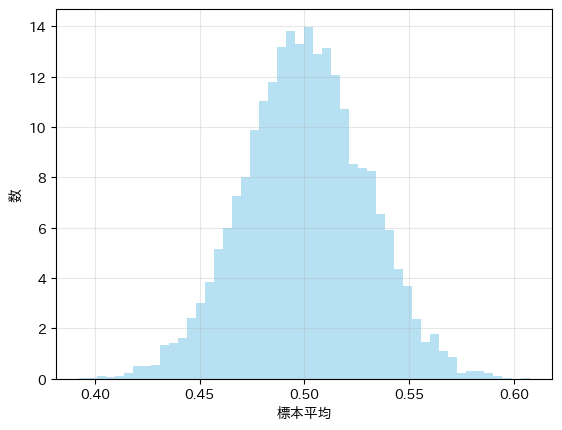

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

np.random.seed(42)

sample_size = 100
num_samples = 10000

population = np.random.uniform(0, 1, 1000000)

sample_means = np.array([
    np.mean(np.random.choice(population, size=sample_size, replace=True))
    for _ in range(num_samples)
])

plt.hist(sample_means, bins=50, density=True, alpha=0.6, color='skyblue')

plt.xlabel('標本平均')
plt.ylabel('数')
plt.grid(True, alpha=0.3)

plt.show()

図を見ると正規分布の形になってますね。

プログラムの説明をします。
7行目の`sample_size`は標本サイズです。
10行目の`population`は0から1の一様分布から100万個のデータを生成し、これを母集団としています。

12から15行目では、母集団から100個のデータをランダムに選び、その平均を計算する操作を1万回繰り返しています。

17行目は計算された1万個の標本平均をヒストグラムで表示しています。

このプログラムの結果として、一様分布から得られた標本平均の分布が正規分布に近似している様子が視覚的に確認できます。

## 95%信頼区間

95%信頼区間を求める一般的な方法は以下の通りです。

1. 標本平均（$\bar{x}$）を計算する
2. 標準誤差（SE: Standard Error）を推定する
3. 信頼係数（通常は1.96、これは標準正規分布の95%信頼区間に対応）を用いる

標準誤差（標本平均の標準偏差）は、母集団の標準偏差を$\sqrt{n}$（$n$は標本サイズ）で割った数になります。

```{math}
Standard Error = \frac{\sigma}{\sqrt{n}}
```

これを用いて95%信頼区間の公式は次のようになります。

```{math}
:label: math-95ci
\bar{x} - 1.96 \cdot SE \leq \mu \leq \bar{x} + 1.96 \cdot SE
```

{eq}`math-95ci`を式変形すると

```{math}
-1.96 \leq Z \leq 1.96 \\
Z = \displaystyle\frac{\bar{x} - \mu}{\displaystyle\sqrt{\frac{\sigma^2}{n}}}
```

のようになります。これを標準化といい、$Z$は平均0、標準偏差1の標準正規分布に従います。

では、47都道府県にある高校の数の区間推定を行ってみます。
無作為に10都道府県のデータを抽出しました。
次の表が抽出したデータです。
ただし、母分散（47都道府県にある高校数の分散）は $\sigma^2=7225$ であるとなぜか分かっており、
高校数の分布は正規分布に従うとします。
このデータから母平均の95%信頼区間を求めてみます。

| 都道府県 | 高校数 |
|----------|:------:|
| 兵庫県   | 205    |
| 大阪府   | 254    |
| 奈良県   | 51     |
| 岩手県   | 79     |
| 千葉県   | 181    |
| 茨城県   | 119    |
| 福岡県   | 163    |
| 山梨県   | 40     |
| 滋賀県   | 56     |
| 鳥取県   | 32     |

標本平均 $\bar{x}$は$\bar{x} = 118$となります。

式{eq}`math-95ci`に値を代入すると

```{math}
  118 - 1.96 \cdot \sqrt{\frac{7225}{10}} \leq \mu \leq 118 + 1.96 \cdot \sqrt{\frac{7225}{10}}
```

となり、計算すると次のようになります。

```{math}
  66.51 \leq \mu \leq 169.49
```

したがって、母平均（全国の平均高校数）の95%信頼区間は66.51校から169.49校となります。

## t検定

先ほどは、母分散がなぜかわかっている状況で区間推定を行いました。
しかし、事前に母分散がわかっている状況はほとんどないと思います。
ここでは、事前に母分散が不明な場合の母平均の区間推定を行います。

母分散$\sigma^2$がわからないときは、代わりに標本不偏分散$s^2$を使います。
式は以下のようになります。

```{math}
s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2
```

$n$ではなく、$n-1$で割っているところがポイントで、
$n-1$で割ることで、サンプルサイズが小さい場合でも母分散をより正確に推定できます。
ちなみに、$n$で割れば、標本分散$S^2$になります。
なぜ$n-1$で割るのかに興味がある人は、やさしく語る確率統計（2013年 オーム社 西岡 康夫）などの教科書を調べてみてください。

標本平均の分布を標準化したものをＺとおくと、{eq}`math-95ci`を式変形し、

```{math}
Z = \displaystyle\frac{\bar{x} - \mu}{\displaystyle\sqrt{\frac{\sigma^2}{n}}}
```

となっていました。この母分散$\sigma^2$を標本不偏分散$s^2$に置き換えた式をtとすると

```{math}
t = \displaystyle\frac{\bar{x} - \mu}{\displaystyle\sqrt{\frac{s^2}{n}}}
```

という式になります。

Zは正規分布に従う式でしたが、このtは**t分布**と呼ばれる分布に従います。

t分布には以下のような特徴があります。

- 正規分布と似た形状を持つ
- 自由度（データの数から1を引いた値）によって形状が変化
- 自由度が大きくなるほど、正規分布に近づく
- 正規分布と比べて、グラフの両端の部分が正規分布よりも高い（外れ値が出やすい）

これらの特徴をプログラムで確認してみましょう。
scipyライブラリを使用してt分布を描画し、正規分布と比較します。

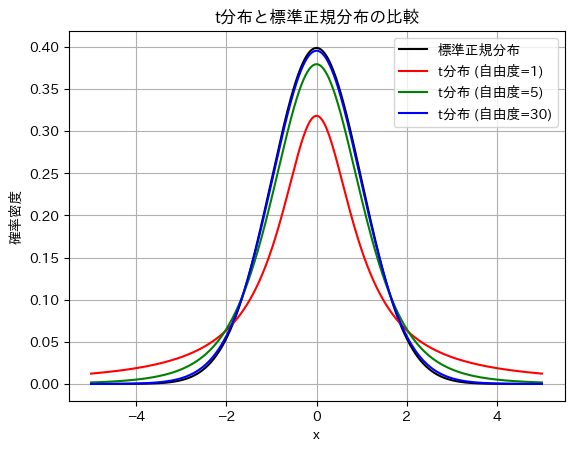

In [4]:
from scipy import stats

x = np.linspace(-5, 5, 1000)

plt.plot(x, stats.norm.pdf(x), label='標準正規分布', color='black')

degrees_of_freedom = [1, 5, 30]
colors = ['red', 'green', 'blue']

for df, color in zip(degrees_of_freedom, colors):
    plt.plot(x, stats.t.pdf(x, df), label=f't分布 (自由度={df})', color=color)

plt.title('t分布と標準正規分布の比較')
plt.xlabel('x')
plt.ylabel('確率密度')
plt.legend()
plt.grid(True)
plt.show()

結果のグラフから、以下のことが分かります。

- 自由度が1の場合、t分布は正規分布と比べて明らかに裾が厚くなっている。
- 自由度が大きくなるにつれて（緑線、青線）、t分布は正規分布に近づいていく。
0 自由度が30の場合（青線）、t分布はほぼ正規分布と重なっている。

このように、t分布は自由度が大きくなるにつれて正規分布に近似していきます。
実際の統計分析では、サンプルサイズが小さい場合（通常30未満）にt分布を使用します。

t分布を使用することで、母分散が不明な場合でも、より正確な区間推定を行うことができます。
特に、サンプルサイズが小さい場合に有効です。

t検定を使って95%信頼区間を求めてみましょう。

t検定を使用した95%信頼区間の計算手順は以下の通りです。

1. 標本平均($\bar{x}$)を計算する
2. 標本不偏分散($s^2$)を計算する
3. 標準誤差(SE)を計算する
4. 自由度を決定する
5. t分布の臨界値を求める
6. 信頼区間を計算する

In [5]:
data = [205, 254, 51, 79, 181, 119, 163, 40, 56, 32]

sample_mean = np.mean(data)

sample_var = np.var(data, ddof=1)  # ddof=1 で不偏分散を計算

n = len(data)
se = np.sqrt(sample_var / n)

df = n - 1

# 95%信頼区間のt値を計算
# 0.975 = 1 - (0.05 / 2): 95%信頼区間の両側検定で、片側2.5%ずつを除外
# これにより、t分布の上側2.5%点（95%点）を求める
t_value = stats.t.ppf(0.975, df)

ci_lower = sample_mean - t_value * se
ci_upper = sample_mean + t_value * se

print(f"標本平均: {sample_mean:.2f}")
print(f"95%信頼区間: ({ci_lower:.2f}, {ci_upper:.2f})")

標本平均: 118.00
95%信頼区間: (61.88, 174.12)


先ほどの正規分布を使用した方法と比較すると、
t検定を使用した場合の信頼区間がわずかに広くなっていることがわかります。
これは、母分散が不明であることによる不確実性を反映しています。

t検定は特に以下の場合に有用です。

- サンプルサイズが小さい場合（一般的に30未満）
- 母分散が不明な場合
- データが正規分布に従っていると仮定できる場合